In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [11]:
import pandas as pd
df = pd.read_csv("/content/comments_with_sentiment.csv")
df.head()

,Comment,label
0,Em a ơiiiiiii,POS
1,Em với ạ,NEU
2,Ib e oi,NEU
3,E dùng gói ng quen dc k a,NEU
4,cơ sở HCM có khác ko ạ,NEU


In [12]:
# 10360 data
df

,Comment,label
0,Em a ơiiiiiii,POS
1,Em với ạ,NEU
2,Ib e oi,NEU
3,E dùng gói ng quen dc k a,NEU
4,cơ sở HCM có khác ko ạ,NEU
...,...,...
10356,: ))) Ủa Nghệ đi lạc đâu đây?,NEU
10357,Gia Linh cute v ạ,POS
10358,Emerson Archer clb mình con đang tuyển tv khom...,NEU
10359,Gia Linh absolutely cinema,NEU


In [13]:
df["label"].value_counts()

,count
label,
NEU,5008
POS,3051
NEG,2302


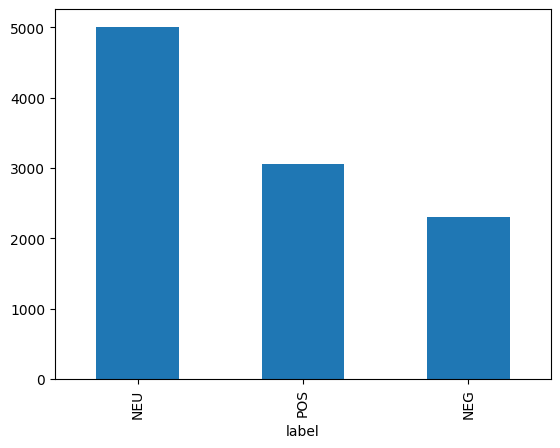

In [14]:
import matplotlib.pyplot as plt
df["label"].value_counts().plot(kind = "bar")
plt.show()

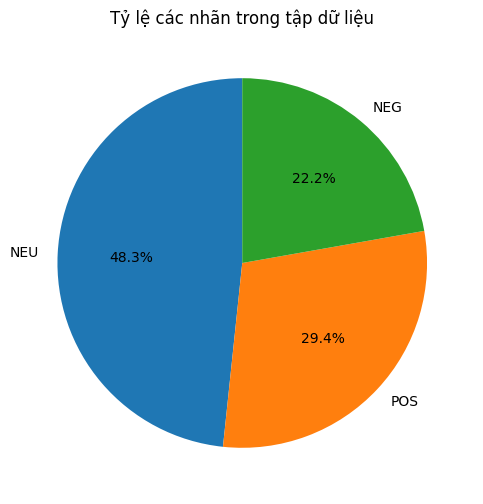

In [15]:
df["label"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6), startangle=90)

plt.title("Tỷ lệ các nhãn trong tập dữ liệu")
plt.ylabel("")  # Ẩn nhãn trục y
plt.show()

In [16]:
# Ánh xạ nhãn chữ sang số
mapping = {"NEG": 0, "NEU": 1, "POS": 2}
df["label"] = df["label"].map(mapping)

# Kiểm tra kết quả
df.head()


,Comment,label
0,Em a ơiiiiiii,2
1,Em với ạ,1
2,Ib e oi,1
3,E dùng gói ng quen dc k a,1
4,cơ sở HCM có khác ko ạ,1


In [17]:
df.head(20)

,Comment,label
0,Em a ơiiiiiii,2
1,Em với ạ,1
2,Ib e oi,1
3,E dùng gói ng quen dc k a,1
4,cơ sở HCM có khác ko ạ,1
5,Vu Cong oke,2
6,giá lạp vjp dư lào v,1
7,Ngành gì đây ạ,1
8,Xin vào nhóm vip free ạ,2
9,Trần Quốc Vượng anh để quả fb thế sao ntin;D,1


# Native Bayes (unprocessed data + BoW  + imbalance)

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 2️⃣ Chia dữ liệu
# ==========================
X = df["Comment"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==========================
# 3️⃣ Biểu diễn dữ liệu bằng Bag of Words
# ==========================
vectorizer = CountVectorizer(max_features=5000)  # Giới hạn số từ đặc trưng
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)


In [20]:
X_train.shape, X_test.shape

((8288,), (2073,))

In [33]:
model = MultinomialNB()
model.fit(X_train_bow, y_train)

# Dự đoán trên train
y_pred_train = model.predict(X_train_bow)
acc_train = accuracy_score(y_train, y_pred_train)
pre_train = precision_score(y_train, y_pred_train, average='macro')
rec_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

# Dự đoán trên test
y_pred_test = model.predict(X_test_bow)
acc_test = accuracy_score(y_test, y_pred_test)
pre_test = precision_score(y_test, y_pred_test, average='macro')
rec_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

results = []
results.append({
        "Train_Acc": acc_train,
        "Train_Pre": pre_train,
        "Train_Rec": rec_train,
        "Train_F1": f1_train,
        "Test_Acc": acc_test,
        "Test_Pre": pre_test,
        "Test_Rec": rec_test,
        "Test_F1": f1_test
    })
metrics_df = pd.DataFrame(results)
metrics_df.index = ["Naive Bayes (unprocessed data + BoW + imbalance)"]

# Làm đẹp kết quả
pd.options.display.float_format = "{:.2f}".format
metrics_df

,Train_Acc,Train_Pre,Train_Rec,Train_F1,Test_Acc,Test_Pre,Test_Rec,Test_F1
Naive Bayes (unprocessed data + BoW + imbalance),0.74,0.76,0.70,0.72,0.63,0.63,0.57,0.59


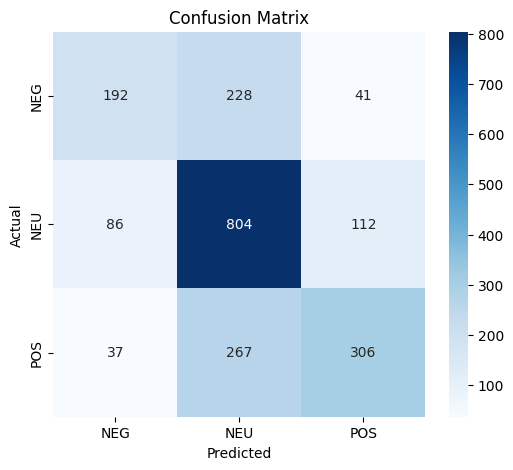

In [34]:
cm = confusion_matrix(y_test, model.predict(X_test_bow))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["NEG", "NEU", "POS"],
            yticklabels=["NEG", "NEU", "POS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

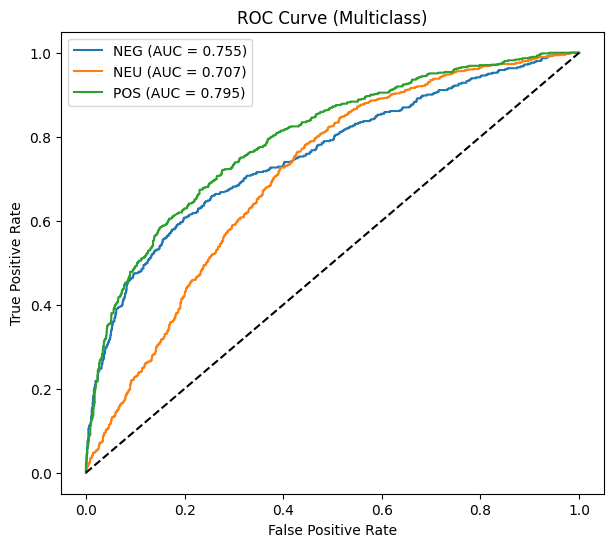

In [35]:
y_score = model.predict_proba(X_test_bow)

# ROC/AUC cho đa lớp (One-vs-Rest)
fpr, tpr, roc_auc = {}, {}, {}
n_classes = len(np.unique(y))

for i in range(n_classes):
    y_true_bin = (y_test == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_true_bin, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7,6))
for i, label in enumerate(["NEG", "NEU", "POS"]):
    plt.plot(fpr[i], tpr[i], label=f"{label} (AUC = {roc_auc[i]:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multiclass)")
plt.legend()
plt.show()

# Naive Bayes (unprocessed data + TF-IDF + imbalance)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Khởi tạo model Naive Bayes
model = MultinomialNB()

# Huấn luyện mô hình
model.fit(X_train_tfidf, y_train)

# Dự đoán
y_pred_train = model.predict(X_train_tfidf)
y_pred_test = model.predict(X_test_tfidf)

model = MultinomialNB()

# Huấn luyện mô hình
model.fit(X_train_tfidf, y_train)

# Dự đoán
y_pred_train = model.predict(X_train_tfidf)
y_pred_test = model.predict(X_test_tfidf)

# Tính metrics
metrics = {
    "Train_Acc": accuracy_score(y_train, y_pred_train),
    "Train_Pre": precision_score(y_train, y_pred_train, average="macro"),
    "Train_Rec": recall_score(y_train, y_pred_train, average="macro"),
    "Train_F1": f1_score(y_train, y_pred_train, average="macro"),
    "Test_Acc": accuracy_score(y_test, y_pred_test),
    "Test_Pre": precision_score(y_test, y_pred_test, average="macro"),
    "Test_Rec": recall_score(y_test, y_pred_test, average="macro"),
    "Test_F1": f1_score(y_test, y_pred_test, average="macro"),
}

df_metrics = pd.DataFrame([metrics])
df_metrics.index = ["Naive Bayes (unprocessed data + TF-IDF + imbalance)"]

pd.options.display.float_format = "{:.2f}".format
df_metrics


,Train_Acc,Train_Pre,Train_Rec,Train_F1,Test_Acc,Test_Pre,Test_Rec,Test_F1
Naive Bayes (unprocessed data + TF-IDF + imbalance),0.67,0.82,0.57,0.59,0.59,0.73,0.47,0.45


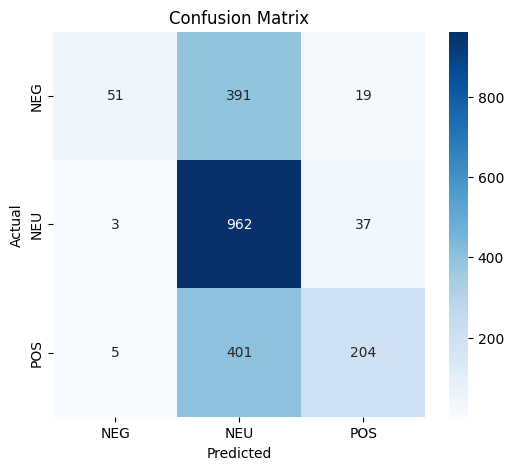

In [40]:
cm = confusion_matrix(y_test, model.predict(X_test_tfidf))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["NEG", "NEU", "POS"],
            yticklabels=["NEG", "NEU", "POS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

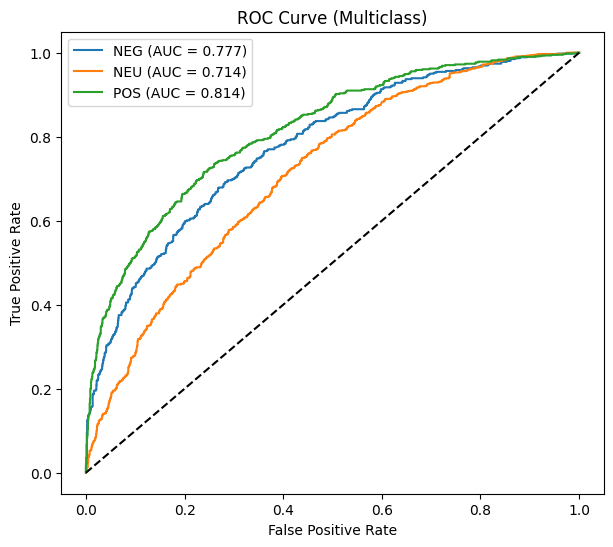

In [41]:
y_score = model.predict_proba(X_test_tfidf)

# ROC/AUC cho đa lớp (One-vs-Rest)
fpr, tpr, roc_auc = {}, {}, {}
n_classes = len(np.unique(y))

for i in range(n_classes):
    y_true_bin = (y_test == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_true_bin, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7,6))
for i, label in enumerate(["NEG", "NEU", "POS"]):
    plt.plot(fpr[i], tpr[i], label=f"{label} (AUC = {roc_auc[i]:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multiclass)")
plt.legend()
plt.show()

# SVM (unprocessed data + BoW + imbalance)

In [44]:
from sklearn.svm import LinearSVC

vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# ===============================
# 3. Train mô hình SVM
# ===============================
model = LinearSVC(random_state=42)
model.fit(X_train_bow, y_train)

# ===============================
# 4. Dự đoán và tính metrics
# ===============================
y_pred_train = model.predict(X_train_bow)
y_pred_test = model.predict(X_test_bow)

metrics = {
    "Train_Acc": accuracy_score(y_train, y_pred_train),
    "Train_Pre": precision_score(y_train, y_pred_train, average="macro"),
    "Train_Rec": recall_score(y_train, y_pred_train, average="macro"),
    "Train_F1": f1_score(y_train, y_pred_train, average="macro"),
    "Test_Acc": accuracy_score(y_test, y_pred_test),
    "Test_Pre": precision_score(y_test, y_pred_test, average="macro"),
    "Test_Rec": recall_score(y_test, y_pred_test, average="macro"),
    "Test_F1": f1_score(y_test, y_pred_test, average="macro"),
}

# Hiển thị metrics dạng bảng
df_metrics = pd.DataFrame([metrics])
df_metrics.index = ["SVM (unprocessed data + BoW + imbalance)"]

pd.options.display.float_format = "{:.2f}".format
df_metrics

,Train_Acc,Train_Pre,Train_Rec,Train_F1,Test_Acc,Test_Pre,Test_Rec,Test_F1
SVM (unprocessed data + BoW + imbalance),0.92,0.93,0.90,0.91,0.62,0.61,0.58,0.59


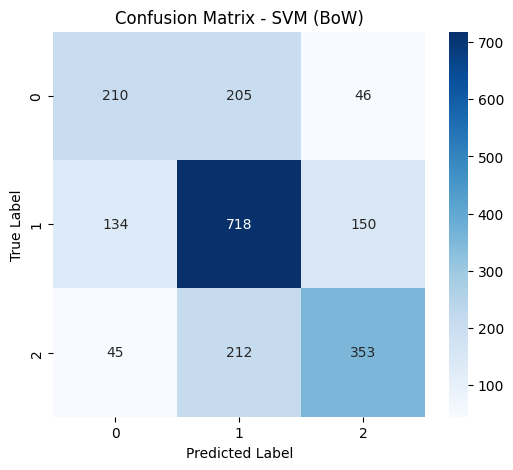

In [45]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM (BoW)")
plt.show()

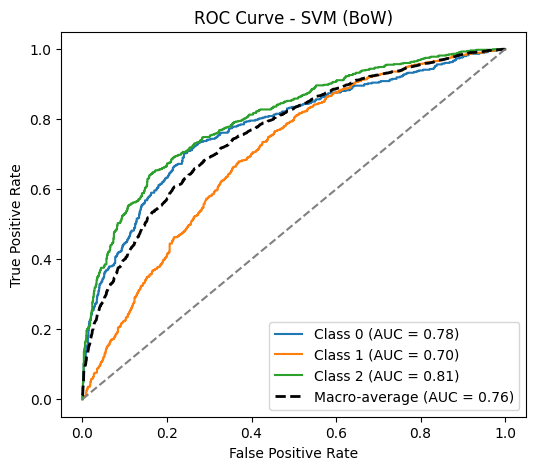

In [49]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
if y_test_bin.shape[1] == 1:
    y_test_bin = np.hstack([1 - y_test_bin, y_test_bin])

# Tính xác suất decision function
y_score = model.decision_function(X_test_bow)

# Tính ROC và AUC cho từng lớp
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tính ROC macro
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_bin.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_bin.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= y_test_bin.shape[1]
roc_auc_macro = auc(all_fpr, mean_tpr)

# Vẽ ROC
plt.figure(figsize=(6, 5))
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=1.5, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot(all_fpr, mean_tpr, color='black', lw=2, linestyle='--',
         label=f'Macro-average (AUC = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (BoW)")
plt.legend(loc="lower right")
plt.show()

# SVM (unprocessed data + TF-IDF + imbalance)

In [50]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# ========================================
# 3. Huấn luyện mô hình SVM
# ========================================
model = LinearSVC(random_state=42)
model.fit(X_train_tfidf, y_train)

# ========================================
# 4. Dự đoán và tính metrics
# ========================================
y_pred_train = model.predict(X_train_tfidf)
y_pred_test = model.predict(X_test_tfidf)

metrics = {
    "Train_Acc": accuracy_score(y_train, y_pred_train),
    "Train_Pre": precision_score(y_train, y_pred_train, average="macro"),
    "Train_Rec": recall_score(y_train, y_pred_train, average="macro"),
    "Train_F1": f1_score(y_train, y_pred_train, average="macro"),
    "Test_Acc": accuracy_score(y_test, y_pred_test),
    "Test_Pre": precision_score(y_test, y_pred_test, average="macro"),
    "Test_Rec": recall_score(y_test, y_pred_test, average="macro"),
    "Test_F1": f1_score(y_test, y_pred_test, average="macro"),
}

# Hiển thị bảng metrics
df_metrics = pd.DataFrame([metrics])
df_metrics.index = ["SVM (unprocessed data + TF-IDF + imbalance)"]

pd.options.display.float_format = "{:.2f}".format
df_metrics

,Train_Acc,Train_Pre,Train_Rec,Train_F1,Test_Acc,Test_Pre,Test_Rec,Test_F1
SVM (unprocessed data + TF-IDF + imbalance),0.88,0.89,0.86,0.87,0.64,0.64,0.61,0.62


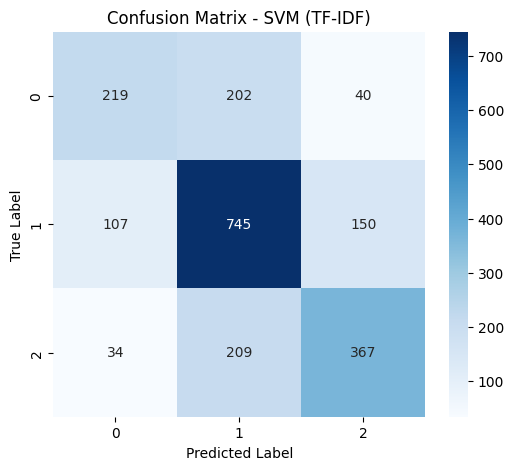

In [53]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM (TF-IDF)")
plt.show()

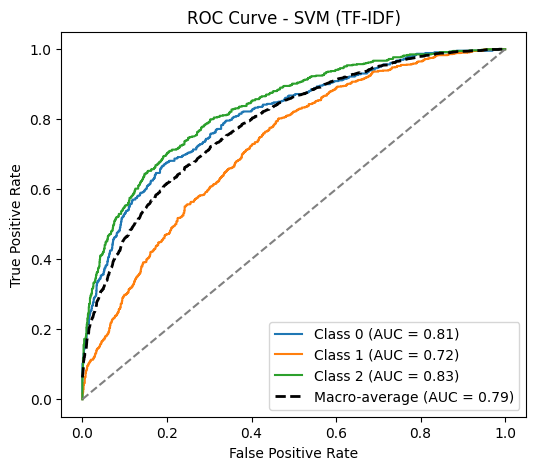

In [54]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
if y_test_bin.shape[1] == 1:
    y_test_bin = np.hstack([1 - y_test_bin, y_test_bin])

# Tính score (decision function)
y_score = model.decision_function(X_test_tfidf)

# Tính ROC và AUC cho từng lớp
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tính ROC macro
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_bin.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_bin.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= y_test_bin.shape[1]
roc_auc_macro = auc(all_fpr, mean_tpr)

# Vẽ ROC
plt.figure(figsize=(6, 5))
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=1.5, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot(all_fpr, mean_tpr, color='black', lw=2, linestyle='--',
         label=f'Macro-average (AUC = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (TF-IDF)")
plt.legend(loc="lower right")
plt.show()


# SVM (unprocessed data + WordEmbedding + imbalance)

In [57]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
embed_model = SentenceTransformer("intfloat/multilingual-e5-large")

X = df["Comment"].tolist()
y = df["label"].tolist()

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Theo hướng dẫn, với E5, để có hiệu quả tốt hơn có thể thêm tiền tố “query:” hoặc “passage:” tùy tác vụ :contentReference[oaicite:1]{index=1}
# Ở đây là classification, nên ta chỉ encode text thẳng
X_train_emb = embed_model.encode(X_train, show_progress_bar=True, convert_to_numpy=True)
X_test_emb = embed_model.encode(X_test, show_progress_bar=True, convert_to_numpy=True)

# ========== 3. Huấn luyện SVM ==========
# Sử dụng SVM với kernel tuyến tính (Linear SVC) hoặc SVC cho vector tính liên tục
model = SVC(kernel="linear", probability=True, random_state=42)
# nếu muốn dùng LinearSVC nhưng LinearSVC không hỗ trợ probability=True => chỉ dùng decision_function

model.fit(X_train_emb, y_train)

# ========== 4. Dự đoán & tính metrics ==========
y_pred_train = model.predict(X_train_emb)
y_pred_test = model.predict(X_test_emb)

metrics = {
    "Train_Acc": accuracy_score(y_train, y_pred_train),
    "Train_Pre": precision_score(y_train, y_pred_train, average="macro"),
    "Train_Rec": recall_score(y_train, y_pred_train, average="macro"),
    "Train_F1": f1_score(y_train, y_pred_train, average="macro"),
    "Test_Acc": accuracy_score(y_test, y_pred_test),
    "Test_Pre": precision_score(y_test, y_pred_test, average="macro"),
    "Test_Rec": recall_score(y_test, y_pred_test, average="macro"),
    "Test_F1": f1_score(y_test, y_pred_test, average="macro"),
}

df_metrics = pd.DataFrame([metrics])
df_metrics.index = ["SVM (unprocessed data + E5 embeddings + imbalance)"]
pd.options.display.float_format = "{:.2f}".format
df_metrics

Batches:   0%|          | 0/259 [00:00<?, ?it/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

,Train_Acc,Train_Pre,Train_Rec,Train_F1,Test_Acc,Test_Pre,Test_Rec,Test_F1
SVM (unprocessed data + E5 embeddings + imbalance),0.67,0.70,0.60,0.62,0.65,0.67,0.57,0.59


# Tiền xử lý văn bản

In [58]:
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.4/978.4 kB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.4 MB/s eta 0:00:00


In [64]:
import pandas as pd
import re
from underthesea import word_tokenize

# 🔹 Đọc dữ liệu gốc
df = pd.read_csv("comments_with_sentiment.csv")

# 🔹 Hàm chuẩn hóa văn bản
def clean_vietnamese_text(text):
    if pd.isna(text):
        return ""

    # 1️⃣ Chuyển về chữ thường
    text = text.lower()

    # 2️⃣ Loại bỏ URL, email, ký tự đặc biệt, số
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"\S+@\S+", '', text)
    text = re.sub(r"[^a-zA-ZÀ-Ỹà-ỹ\s]", " ", text)

    # 3️⃣ Chuẩn hóa từ viết tắt và từ mạng
    replace_dict = {
        "ko": "không", "k": "không", "hok": "không",
        "kg": "không", "khg": "không", "kh": "không",
        "j": "gì", "z": "d", "vs": "với", "wa": "quá",
        "thjk": "thích", "cx": "cũng", "đc": "được",
        "dc": "được", "sp": "sản phẩm", "okie": "ok", "oke": "ok", "nt": "nhắn tin", "ib": "inbox", "chx": "chưa",
        "fb": "facebook", "inb": "inbox", "ntin": "nhắn tin", "str": "story"
    }
    for k, v in replace_dict.items():
        text = re.sub(r"\b{}\b".format(k), v, text)

    # 4️⃣ Tách từ bằng underthesea
    text = word_tokenize(text, format="text")

    # 5️⃣ Loại bỏ stop words nhẹ (không loại “không”, “chẳng”, “chưa”)
    stop_words = {"và", "thì", "là", "có", "đã", "này", "ấy", "rồi", "nữa"}
    text = " ".join([word for word in text.split() if word not in stop_words])

    # 6️⃣ Xóa khoảng trắng dư thừa
    text = re.sub(r"\s+", " ", text).strip()

    return text

# 🔹 Áp dụng cho toàn bộ cột văn bản
df['cleaned_text'] = df['Comment'].apply(clean_vietnamese_text)

# 🔹 Hiển thị mẫu kết quả
df.head()


,Comment,label,cleaned_text
0,Em a ơiiiiiii,POS,em a ơiiiiiii
1,Em với ạ,NEU,em với ạ
2,Ib e oi,NEU,inbox e_oi
3,E dùng gói ng quen dc k a,NEU,e dùng gói ng quen được không a
4,cơ sở HCM có khác ko ạ,NEU,cơ_sở hcm khác không ạ


In [65]:
df.head(30)

,Comment,label,cleaned_text
0,Em a ơiiiiiii,POS,em a ơiiiiiii
1,Em với ạ,NEU,em với ạ
2,Ib e oi,NEU,inbox e_oi
3,E dùng gói ng quen dc k a,NEU,e dùng gói ng quen được không a
4,cơ sở HCM có khác ko ạ,NEU,cơ_sở hcm khác không ạ
5,Vu Cong oke,POS,vu cong ok
6,giá lạp vjp dư lào v,NEU,giá lạp vjp dư_lào v
7,Ngành gì đây ạ,NEU,ngành gì đây ạ
8,Xin vào nhóm vip free ạ,POS,xin vào nhóm vip free ạ
9,Trần Quốc Vượng anh để quả fb thế sao ntin;D,NEU,trần quốc_vượng anh để quả facebook thế sao nh...


# Dùng Oversampling

In [67]:
X = df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

train_df = pd.DataFrame({'text': X_train.values, 'label': y_train.values}).reset_index(drop=True)
test_df  = pd.DataFrame({'text': X_test.values,  'label': y_test.values}).reset_index(drop=True)

print("\nTrain shape:", train_df.shape, "Test shape:", test_df.shape)
print("Train class counts (before balancing):\n", train_df['label'].value_counts())

# ========== 3. Cân bằng dữ liệu trên tập train bằng UpSampling ==========
class_counts = train_df['label'].value_counts()
max_count = class_counts.max()

upsampled = []
for cls, cnt in class_counts.items():
    cls_df = train_df[train_df['label'] == cls]
    if cnt < max_count:
        sampled = cls_df.sample(max_count, replace=True, random_state=42)
        upsampled.append(sampled)
    else:
        upsampled.append(cls_df)
train_balanced = pd.concat(upsampled).sample(frac=1, random_state=42).reset_index(drop=True)

print("\nTrain class counts (after upsampling):\n", train_balanced['label'].value_counts())


Train shape: (8288, 2) Test shape: (2073, 2)
Train class counts (before balancing):
 label
NEU    4006
POS    2441
NEG    1841
Name: count, dtype: int64

Train class counts (after upsampling):
 label
POS    4006
NEG    4006
NEU    4006
Name: count, dtype: int64


In [71]:
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(train_balanced['text'])
X_test_bow  = vectorizer.transform(test_df['text'])


model = MultinomialNB()
model.fit(X_train_bow, train_balanced['label'])

y_pred_train = model.predict(X_train_bow)
y_pred_test  = model.predict(X_test_bow)

# metrics train
acc_tr = accuracy_score(train_balanced['label'], y_pred_train)
pre_tr = precision_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
rec_tr = recall_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
f1_tr  = f1_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)

# metrics test
acc_te = accuracy_score(test_df['label'], y_pred_test)
pre_te = precision_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
rec_te = recall_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
f1_te  = f1_score(test_df['label'], y_pred_test, average='macro', zero_division=0)

results = []
results.append({
        'Train_Acc': acc_tr, 'Train_Precision': pre_tr, 'Train_Recall': rec_tr, 'Train_F1': f1_tr,
        'Test_Acc': acc_te,  'Test_Precision': pre_te,  'Test_Recall': rec_te,  'Test_F1': f1_te
    })
metrics_df = pd.DataFrame(results)
metrics_df.index = ["Naive Bayes (preprocessed data + BoW + oversample)"]

# Làm đẹp kết quả
pd.options.display.float_format = "{:.2f}".format
metrics_df

,Train_Acc,Train_Precision,Train_Recall,Train_F1,Test_Acc,Test_Precision,Test_Recall,Test_F1
Naive Bayes (preprocessed data + BoW + oversample),0.78,0.78,0.78,0.78,0.56,0.55,0.55,0.55


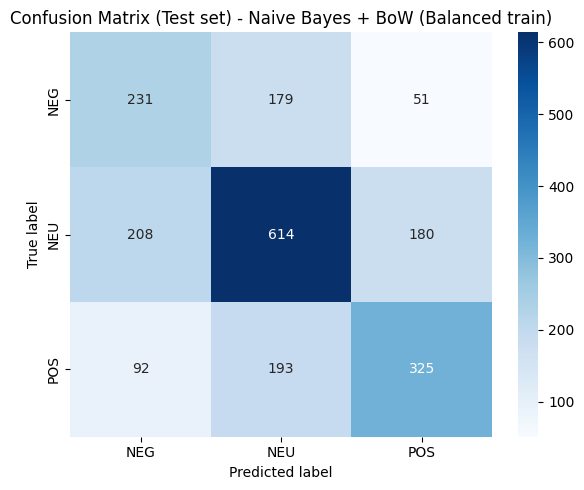

In [73]:
y_pred_test_final = model.predict(X_test_bow)
labels = list(model.classes_)  # đảm bảo thứ tự trùng với predict_proba
cm = confusion_matrix(test_df['label'], y_pred_test_final, labels=labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test set) - Naive Bayes + BoW (Balanced train)")
plt.tight_layout()
plt.show()

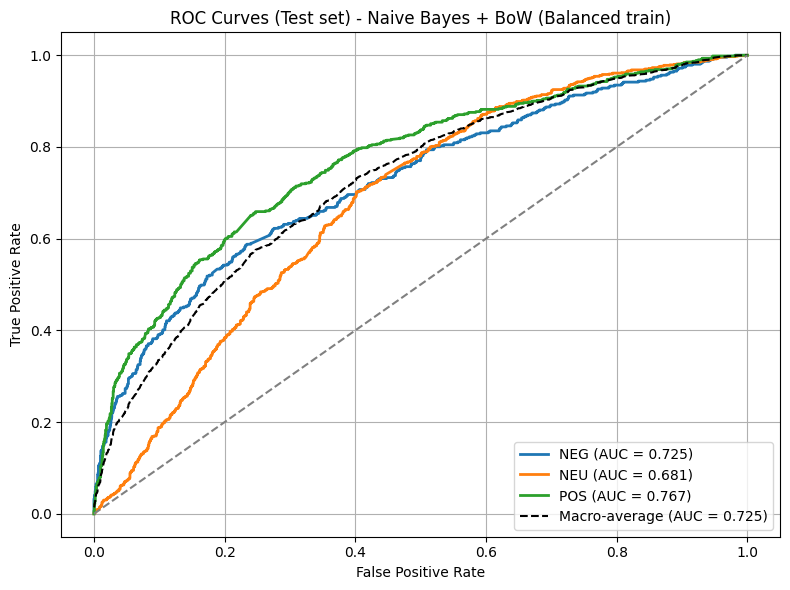

In [74]:
classes = np.array(model.classes_)
y_test_bin = label_binarize(test_df['label'], classes=classes)
n_classes = y_test_bin.shape[1]

# predict_proba
y_score = model.predict_proba(X_test_bow)  # shape (n_samples, n_classes) in order model.classes_

# Tính fpr/tpr/auc cho từng lớp nếu lớp có dương sample trong test
fpr = dict(); tpr = dict(); roc_auc = dict()
for i, cls in enumerate(classes):
    # kiểm tra lớp có trong test không
    if cls in test_df['label'].values:
        # tìm index của cls trong classes (tương ứng cột y_test_bin)
        col_index = list(classes).index(cls)
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, col_index], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    else:
        # nếu lớp không xuất hiện trong test, bỏ qua
        fpr[i], tpr[i], roc_auc[i] = np.array([0,1]), np.array([0,1]), np.nan

# Vẽ ROC
plt.figure(figsize=(8,6))
plotted = False
for i, cls in enumerate(classes):
    if not np.isnan(roc_auc[i]):
        plt.plot(fpr[i], tpr[i], lw=2, label=f"{cls} (AUC = {roc_auc[i]:.3f})")
        plotted = True

if not plotted:
    print("Không có lớp hợp lệ để vẽ ROC (có thể do test set thiếu lớp nào đó).")
else:
    # macro-average
    valid_idxs = [i for i in range(len(classes)) if not np.isnan(roc_auc[i])]
    all_fpr = np.unique(np.concatenate([fpr[i] for i in valid_idxs]))
    mean_tpr = np.zeros_like(all_fpr, dtype=float)
    for i in valid_idxs:
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(valid_idxs)
    roc_auc_macro = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, linestyle='--', color='black', label=f"Macro-average (AUC = {roc_auc_macro:.3f})")
    plt.plot([0,1], [0,1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves (Test set) - Naive Bayes + BoW (Balanced train)")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Dùng Smote

In [75]:
df

,Comment,label,cleaned_text
0,Em a ơiiiiiii,POS,em a ơiiiiiii
1,Em với ạ,NEU,em với ạ
2,Ib e oi,NEU,inbox e_oi
3,E dùng gói ng quen dc k a,NEU,e dùng gói ng quen được không a
4,cơ sở HCM có khác ko ạ,NEU,cơ_sở hcm khác không ạ
...,...,...,...
10356,: ))) Ủa Nghệ đi lạc đâu đây?,NEU,ủa_nghệ đi_lạc đâu_đây
10357,Gia Linh cute v ạ,POS,gia linh_cute v ạ
10358,Emerson Archer clb mình con đang tuyển tv khom...,NEU,emerson archer clb mình con đang tuyển tv khom...
10359,Gia Linh absolutely cinema,NEU,gia_linh absolutely cinema


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

X = df['cleaned_text']
y = df['label']

# === 2. Chia dữ liệu trước, giữ stratify ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Trước SMOTE:")
print(y_train.value_counts())

# === 3. BoW trước khi SMOTE ===
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow  = vectorizer.transform(X_test)

# === 4. Áp dụng SMOTE trên tập train ===
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_bow, y_train)

print("\nSau SMOTE:")
print(pd.Series(y_train_bal).value_counts())

# === 5. Train mô hình Naive Bayes ===
model = MultinomialNB()
model.fit(X_train_bal, y_train_bal)

# === 6. Dự đoán ===
y_pred_train = model.predict(X_train_bal)
y_pred_test  = model.predict(X_test_bow)

# === 7. Tính metrics ===
acc_tr = accuracy_score(y_train_bal, y_pred_train)
pre_tr = precision_score(y_train_bal, y_pred_train, average='macro', zero_division=0)
rec_tr = recall_score(y_train_bal, y_pred_train, average='macro', zero_division=0)
f1_tr  = f1_score(y_train_bal, y_pred_train, average='macro', zero_division=0)

acc_te = accuracy_score(y_test, y_pred_test)
pre_te = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
rec_te = recall_score(y_test, y_pred_test, average='macro', zero_division=0)
f1_te  = f1_score(y_test, y_pred_test, average='macro', zero_division=0)

# === 8. Hiển thị kết quả ===
results = [{
    'Train_Acc': acc_tr, 'Train_Pre': pre_tr, 'Train_Rec': rec_tr, 'Train_F1': f1_tr,
    'Test_Acc': acc_te, 'Test_Pre': pre_te, 'Test_Rec': rec_te, 'Test_F1': f1_te
}]
metrics_df = pd.DataFrame(results)
metrics_df.index = ["Naive Bayes (BoW + SMOTE)"]

pd.options.display.float_format = "{:.2f}".format
display(metrics_df)

Trước SMOTE:
label
NEU    4006
POS    2441
NEG    1841
Name: count, dtype: int64

Sau SMOTE:
label
POS    4006
NEU    4006
NEG    4006
Name: count, dtype: int64


,Train_Acc,Train_Pre,Train_Rec,Train_F1,Test_Acc,Test_Pre,Test_Rec,Test_F1
Naive Bayes (BoW + SMOTE),0.71,0.72,0.71,0.71,0.56,0.55,0.56,0.55


# SVM (preprocessed data + BoW + oversample)

In [79]:
from sklearn.utils import resample
X = df['cleaned_text']
y = df['label']

# ================== 2. CHIA TẬP DỮ LIỆU ==================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

train_df = pd.DataFrame({'text': X_train, 'label': y_train}).reset_index(drop=True)
test_df = pd.DataFrame({'text': X_test, 'label': y_test}).reset_index(drop=True)

print("Train class counts (before balancing):\n", train_df['label'].value_counts())

# ================== 3. OVERSAMPLING TRÊN TẬP TRAIN ==================
class_counts = train_df['label'].value_counts()
max_count = class_counts.max()

oversampled = []
for cls, cnt in class_counts.items():
    cls_df = train_df[train_df['label'] == cls]
    if cnt < max_count:
        sampled = resample(cls_df, replace=True, n_samples=max_count, random_state=42)
        oversampled.append(sampled)
    else:
        oversampled.append(cls_df)

train_balanced = pd.concat(oversampled).sample(frac=1, random_state=42).reset_index(drop=True)
print("\nTrain class counts (after oversampling):\n", train_balanced['label'].value_counts())

# ================== 4. TF-IDF VECTORIZE ==================
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(train_balanced['text'])
X_test_tfidf = tfidf.transform(test_df['text'])

# ================== 5. TRAIN NAIVE BAYES ==================
model = MultinomialNB()
model.fit(X_train_tfidf, train_balanced['label'])

y_pred_train = model.predict(X_train_tfidf)
y_pred_test  = model.predict(X_test_tfidf)

# metrics train
acc_tr = accuracy_score(train_balanced['label'], y_pred_train)
pre_tr = precision_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
rec_tr = recall_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
f1_tr  = f1_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)

# metrics test
acc_te = accuracy_score(test_df['label'], y_pred_test)
pre_te = precision_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
rec_te = recall_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
f1_te  = f1_score(test_df['label'], y_pred_test, average='macro', zero_division=0)

results = []
results.append({
        'Train_Acc': acc_tr, 'Train_Precision': pre_tr, 'Train_Recall': rec_tr, 'Train_F1': f1_tr,
        'Test_Acc': acc_te,  'Test_Precision': pre_te,  'Test_Recall': rec_te,  'Test_F1': f1_te
    })
metrics_df = pd.DataFrame(results)
metrics_df.index = ["Naive Bayes (preprocessed data + BoW + oversample)"]

# Làm đẹp kết quả
pd.options.display.float_format = "{:.2f}".format
metrics_df

Train class counts (before balancing):
 label
NEU    4006
POS    2441
NEG    1841
Name: count, dtype: int64

Train class counts (after oversampling):
 label
POS    4006
NEG    4006
NEU    4006
Name: count, dtype: int64


,Train_Acc,Train_Precision,Train_Recall,Train_F1,Test_Acc,Test_Precision,Test_Recall,Test_F1
Naive Bayes (preprocessed data + BoW + oversample),0.81,0.81,0.81,0.81,0.58,0.56,0.56,0.56


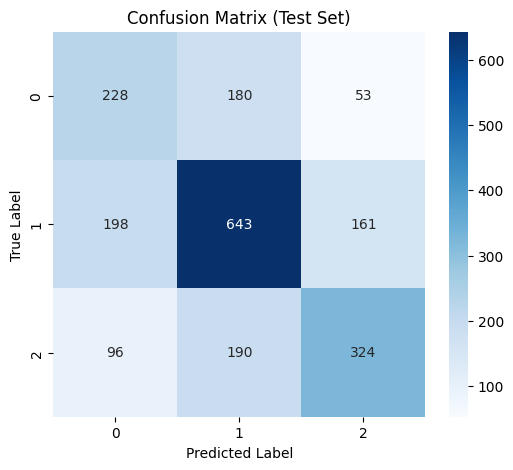

In [81]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(test_df['label'], y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

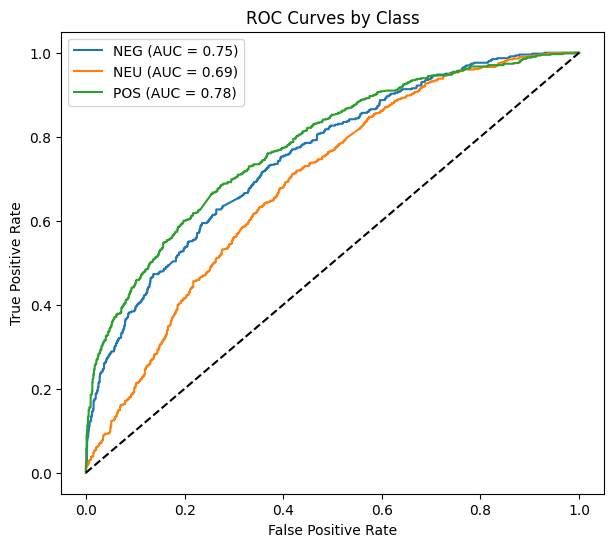

In [82]:
from sklearn.preprocessing import label_binarize
labels = sorted(df['label'].unique())
y_test_bin = label_binarize(test_df['label'], classes=labels)
y_pred_prob = model.predict_proba(X_test_tfidf)

plt.figure(figsize=(7,6))
for i, label in enumerate(labels):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves by Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# SVM (preprocessed data + BoW + oversample)

In [83]:
X = df['cleaned_text']
y = df['label']

# ================== 3. CHIA DỮ LIỆU ==================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

train_df = pd.DataFrame({'text': X_train, 'label': y_train}).reset_index(drop=True)
test_df = pd.DataFrame({'text': X_test, 'label': y_test}).reset_index(drop=True)

print("Train class counts (before balancing):\n", train_df['label'].value_counts())

# ================== 4. OVERSAMPLING TRÊN TRAIN ==================
class_counts = train_df['label'].value_counts()
max_count = class_counts.max()
oversampled = []

for cls, cnt in class_counts.items():
    cls_df = train_df[train_df['label'] == cls]
    if cnt < max_count:
        sampled = resample(cls_df, replace=True, n_samples=max_count, random_state=42)
        oversampled.append(sampled)
    else:
        oversampled.append(cls_df)

train_balanced = pd.concat(oversampled).sample(frac=1, random_state=42).reset_index(drop=True)

print("\nTrain class counts (after oversampling):\n", train_balanced['label'].value_counts())

# ================== 5. EMBEDDING BoW ==================
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(train_balanced['text'])
X_test_bow = vectorizer.transform(test_df['text'])

# ================== 6. HUẤN LUYỆN SVM ==================
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train_bow, train_balanced['label'])

y_pred_train = model.predict(X_train_bow)
y_pred_test  = model.predict(X_test_bow)

# metrics train
acc_tr = accuracy_score(train_balanced['label'], y_pred_train)
pre_tr = precision_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
rec_tr = recall_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
f1_tr  = f1_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)

# metrics test
acc_te = accuracy_score(test_df['label'], y_pred_test)
pre_te = precision_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
rec_te = recall_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
f1_te  = f1_score(test_df['label'], y_pred_test, average='macro', zero_division=0)

results = []
results.append({
        'Train_Acc': acc_tr, 'Train_Precision': pre_tr, 'Train_Recall': rec_tr, 'Train_F1': f1_tr,
        'Test_Acc': acc_te,  'Test_Precision': pre_te,  'Test_Recall': rec_te,  'Test_F1': f1_te
    })
metrics_df = pd.DataFrame(results)
metrics_df.index = ["Naive Bayes (preprocessed data + BoW + oversample)"]

# Làm đẹp kết quả
pd.options.display.float_format = "{:.2f}".format
metrics_df

Train class counts (before balancing):
 label
NEU    4006
POS    2441
NEG    1841
Name: count, dtype: int64

Train class counts (after oversampling):
 label
POS    4006
NEG    4006
NEU    4006
Name: count, dtype: int64


,Train_Acc,Train_Precision,Train_Recall,Train_F1,Test_Acc,Test_Precision,Test_Recall,Test_F1
Naive Bayes (preprocessed data + BoW + oversample),0.91,0.91,0.91,0.91,0.57,0.55,0.53,0.54


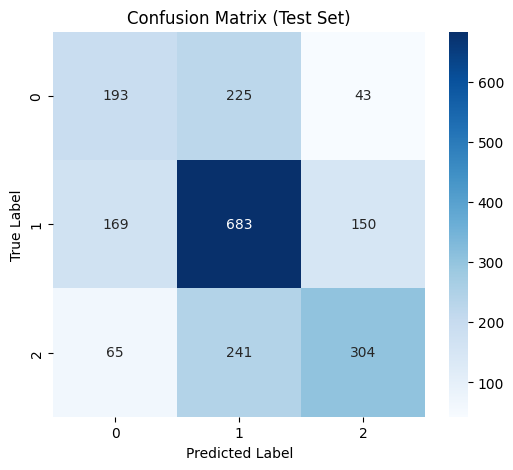

In [84]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(test_df['label'], y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

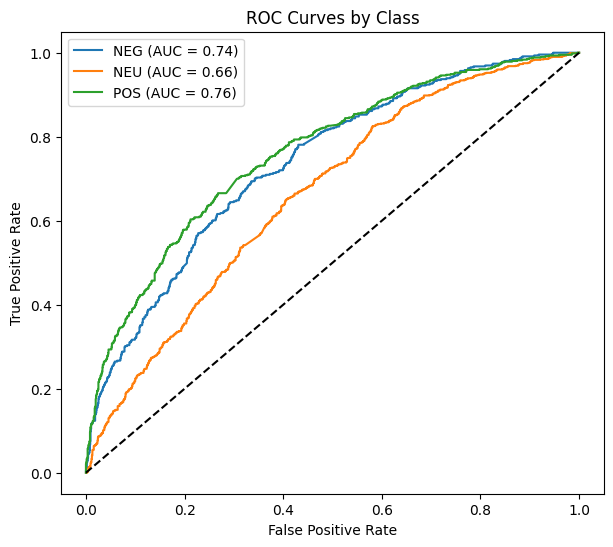

In [85]:
from sklearn.preprocessing import label_binarize
labels = sorted(df['label'].unique())
y_test_bin = label_binarize(test_df['label'], classes=labels)
y_pred_prob = model.predict_proba(X_test_tfidf)

plt.figure(figsize=(7,6))
for i, label in enumerate(labels):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves by Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# SVM (preprocessed data + TF-IDF + oversample)

In [87]:
X = df['cleaned_text']
y = df['label']

# ================== 3. CHIA DỮ LIỆU ==================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

train_df = pd.DataFrame({'text': X_train, 'label': y_train}).reset_index(drop=True)
test_df = pd.DataFrame({'text': X_test, 'label': y_test}).reset_index(drop=True)

print("Train class counts (before balancing):\n", train_df['label'].value_counts())

# ================== 4. OVERSAMPLING TRÊN TRAIN ==================
class_counts = train_df['label'].value_counts()
max_count = class_counts.max()
oversampled = []

for cls, cnt in class_counts.items():
    cls_df = train_df[train_df['label'] == cls]
    if cnt < max_count:
        sampled = resample(cls_df, replace=True, n_samples=max_count, random_state=42)
        oversampled.append(sampled)
    else:
        oversampled.append(cls_df)

train_balanced = pd.concat(oversampled).sample(frac=1, random_state=42).reset_index(drop=True)
print("\nTrain class counts (after oversampling):\n", train_balanced['label'].value_counts())

# ================== 5. TF-IDF EMBEDDING ==================
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_balanced['text'])
X_test_tfidf = vectorizer.transform(test_df['text'])

# ================== 6. HUẤN LUYỆN SVM ==================
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_tfidf, train_balanced['label'])

y_pred_train = model.predict(X_train_tfidf)
y_pred_test  = model.predict(X_test_tfidf)

# metrics train
acc_tr = accuracy_score(train_balanced['label'], y_pred_train)
pre_tr = precision_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
rec_tr = recall_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
f1_tr  = f1_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)

# metrics test
acc_te = accuracy_score(test_df['label'], y_pred_test)
pre_te = precision_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
rec_te = recall_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
f1_te  = f1_score(test_df['label'], y_pred_test, average='macro', zero_division=0)

results = []
results.append({
        'Train_Acc': acc_tr, 'Train_Precision': pre_tr, 'Train_Recall': rec_tr, 'Train_F1': f1_tr,
        'Test_Acc': acc_te,  'Test_Precision': pre_te,  'Test_Recall': rec_te,  'Test_F1': f1_te
    })
metrics_df = pd.DataFrame(results)
metrics_df.index = ["Naive Bayes (preprocessed data + BoW + oversample)"]

# Làm đẹp kết quả
pd.options.display.float_format = "{:.2f}".format
metrics_df

Train class counts (before balancing):
 label
NEU    4006
POS    2441
NEG    1841
Name: count, dtype: int64

Train class counts (after oversampling):
 label
POS    4006
NEG    4006
NEU    4006
Name: count, dtype: int64


,Train_Acc,Train_Precision,Train_Recall,Train_F1,Test_Acc,Test_Precision,Test_Recall,Test_F1
Naive Bayes (preprocessed data + BoW + oversample),0.69,0.81,0.69,0.68,0.57,0.61,0.48,0.48


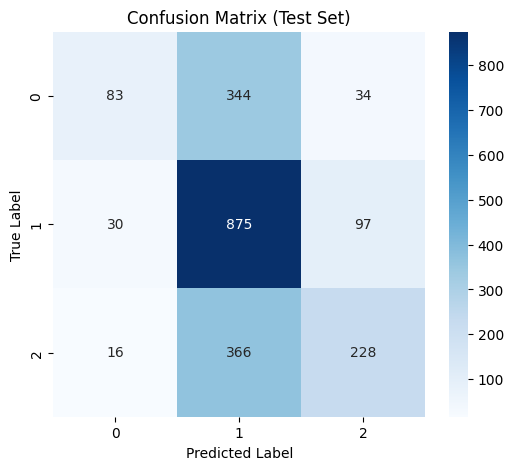

In [88]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(test_df['label'], y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

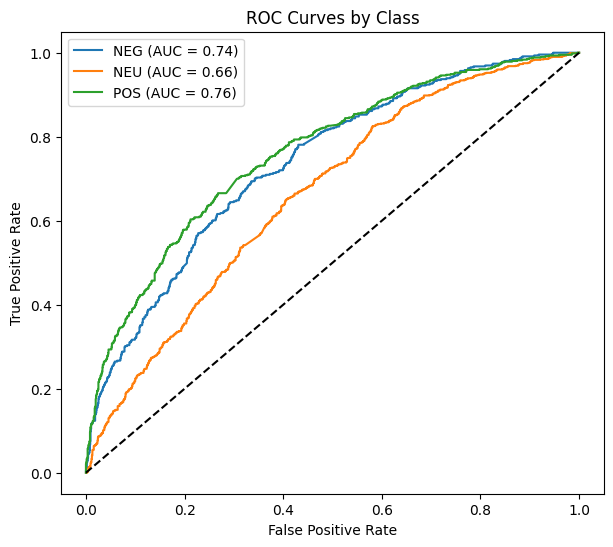

In [89]:
from sklearn.preprocessing import label_binarize
labels = sorted(df['label'].unique())
y_test_bin = label_binarize(test_df['label'], classes=labels)
y_pred_prob = model.predict_proba(X_test_tfidf)

plt.figure(figsize=(7,6))
for i, label in enumerate(labels):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves by Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# SVM (preprocessed data + WordEmbedding + oversample)

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
from sentence_transformers import SentenceTransformer
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt



X = df['cleaned_text']
y = df["label"]

# --- 2. Chia dữ liệu train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3. Oversampling ---
oversample = RandomOverSampler(random_state=42)
X_train_res, y_train_res = oversample.fit_resample(X_train.values.reshape(-1, 1), y_train)
X_train_res = X_train_res.ravel()

# --- 4. Sinh embedding từ E5 model ---
print("Đang tải mô hình embedding 'intfloat/multilingual-e5-large' ...")
model = SentenceTransformer("intfloat/multilingual-e5-large")

print("Đang tạo embedding cho tập train và test ...")
emb_train = model.encode(X_train_res.tolist(), show_progress_bar=True)
emb_test = model.encode(X_test.tolist(), show_progress_bar=True)

# --- 5. Huấn luyện mô hình SVM ---
model = SVC(kernel="linear", probability=True, random_state=42)
model.fit(emb_train, y_train_res)



Đang tải mô hình embedding 'intfloat/multilingual-e5-large' ...
Đang tạo embedding cho tập train và test ...


Batches:   0%|          | 0/376 [00:00<?, ?it/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

ValueError: X has 1024 features, but SVC is expecting 5000 features as input.

In [91]:
y_pred_train = model.predict(emb_train)
y_pred_test = model.predict(emb_test)

acc_tr = accuracy_score(train_balanced['label'], y_pred_train)
pre_tr = precision_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
rec_tr = recall_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
f1_tr  = f1_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)

# metrics test
acc_te = accuracy_score(test_df['label'], y_pred_test)
pre_te = precision_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
rec_te = recall_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
f1_te  = f1_score(test_df['label'], y_pred_test, average='macro', zero_division=0)

results = []
results.append({
        'Train_Acc': acc_tr, 'Train_Precision': pre_tr, 'Train_Recall': rec_tr, 'Train_F1': f1_tr,
        'Test_Acc': acc_te,  'Test_Precision': pre_te,  'Test_Recall': rec_te,  'Test_F1': f1_te
    })
metrics_df = pd.DataFrame(results)
metrics_df.index = ["Naive Bayes (preprocessed data + BoW + oversample)"]

# Làm đẹp kết quả
pd.options.display.float_format = "{:.2f}".format
metrics_df

,Train_Acc,Train_Precision,Train_Recall,Train_F1,Test_Acc,Test_Precision,Test_Recall,Test_F1
Naive Bayes (preprocessed data + BoW + oversample),0.33,0.33,0.33,0.33,0.60,0.59,0.61,0.60


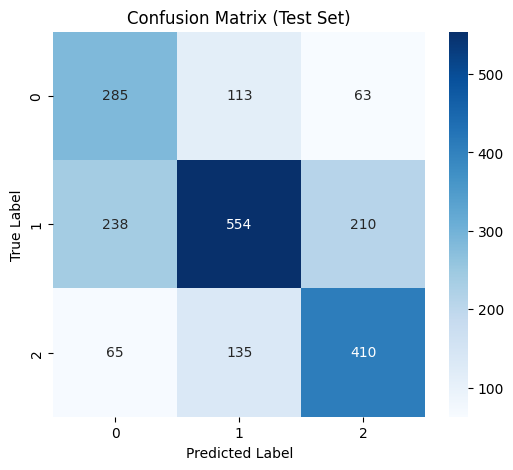

In [92]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(test_df['label'], y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()